In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Data

In [2]:
filename = '../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt'

In [7]:
data = Table.read(filename, format='ascii.commented_header')

#### Collect $R_{turn}$, $V_{max}$ for each galaxy based on which rotation curve was used for the final analysis

In [8]:
data['r_turn_used'] = np.zeros(len(data), dtype=float)
data['v_max_used'] = np.NaN*np.ones(len(data), dtype=float)
data['v_max_data_used'] = np.NaN*np.ones(len(data), dtype=float)

for i in range(len(data)):
    curve_used = data['curve_used'][i]
    
    # Positive rotation curve
    if curve_used == 1:
        data['r_turn_used'][i] = data['pos_r_turn'][i]
        data['v_max_used'][i] = data['pos_v_max'][i]
        data['v_max_data_used'][i] = data['pos_Vmax_data'][i]
    elif curve_used == 0:
        data['r_turn_used'][i] = data['avg_r_turn'][i]
        data['v_max_used'][i] = data['avg_v_max'][i]
        data['v_max_data_used'][i] = data['avg_Vmax_data'][i]
    elif curve_used == -1:
        data['r_turn_used'][i] = data['neg_r_turn'][i]
        data['v_max_used'][i] = data['neg_v_max'][i]
        data['v_max_data_used'][i] = np.abs(data['neg_Vmax_data'][i])

In [9]:
print(data['v_max_data_used'].min(), data['v_max_data_used'].max())
print(data['v_max_used'].min(), data['v_max_used'].max())

nan nan
nan nan


In [10]:
print(data['Rmax'].min(), data['Rmax'].max())
print(data['r_turn_used'].min(), data['r_turn_used'].max())

-1.0 143.88961678118082
0.0 61811.235420030716


In [11]:
data['Rmax_Rturn_ratio'] = data['Rmax']/data['r_turn_used']
data['Vmax_data_fit_ratio'] = data['v_max_data_used']/data['v_max_used']

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


# Relationship between $R_{max}$ and $R_{turn}$

Regina noticed that there is an unusually high number of galaxies with $\frac{R_{max}}{R_{turn}} = 4$.  Can I replicate this, and if so, what is causing this?

This is due to the lower bound on $R_{turn}$ being set to `0.25*r_turn_guess`, where `r_turn_guess` is equal to the radius of the maximum measured velocity.  Because the measured maximum velocity is often at $R_{max}$, this lower bound is often equal to $0.25R_{max}$.  This lower bound has been set to 0 instead.

<IPython.core.display.Javascript object>


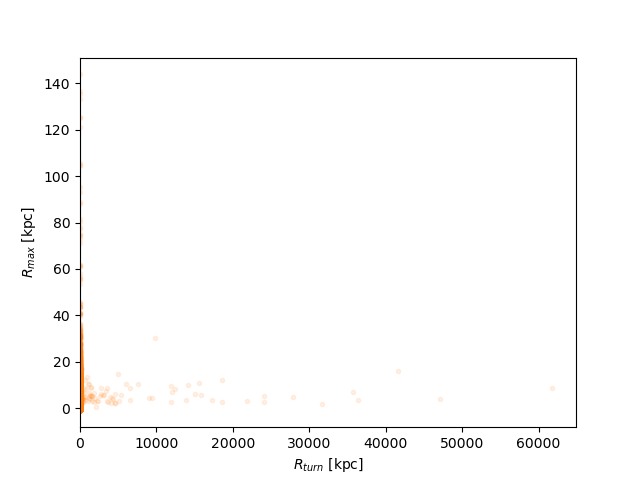

In [16]:
%matplotlib notebook

plt.figure()

plt.plot([0,30], [0,120], alpha=0.1)
plt.plot(data['r_turn_used'], data['Rmax'], '.', alpha=0.1)

plt.xlim(xmin=0)

plt.ylabel('$R_{max}$ [kpc]')
plt.xlabel('$R_{turn}$ [kpc]');

<IPython.core.display.Javascript object>


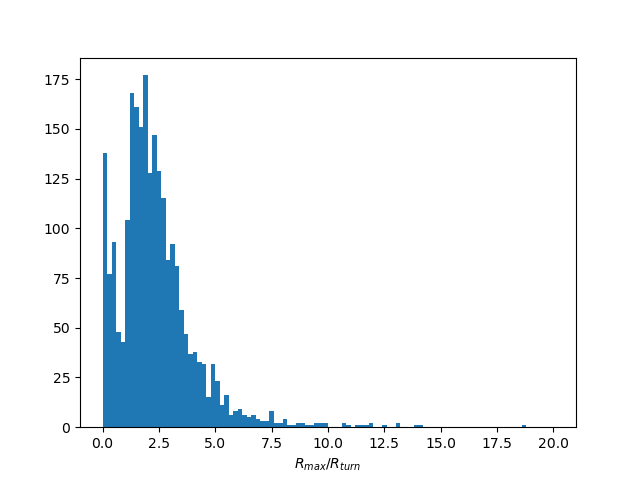

In [21]:
%matplotlib notebook

plt.figure()

plt.hist(data['Rmax_Rturn_ratio'], bins=100, range=(0,20))

plt.xlabel('$R_{max}$/$R_{turn}$');

In [38]:
counts, bin_edges = np.histogram(data['Rmax_Rturn_ratio'], bins=100, range=(0,10))

In [39]:
print(counts)
print(bin_edges)

[  0   0   0   0   0  43  60  56  51  49  74  76  93 103  93  94  84  82
  99  86  68  78  65  77  70  61  63  58  46  42  46  45  48  43  38  21
  23  23  18  95  15  13  25  20  13  19  11   4  13  19  11   8   7   8
   7   3   4   4   2   4   1   5   2   3   1   1   2   1   0   1   2   0
   0   2   3   1   2   0   1   3   2   1   0   0   0   0   1   1   0   0
   1   1   0   1   0   0   0   1   0   0]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [42]:
galaxies_with_ratio_between_3p9and4p0 = np.logical_and(data['Rmax_Rturn_ratio'] >= 3.999, 
                                                       data['Rmax_Rturn_ratio'] <= 4.0)

In [43]:
data[galaxies_with_ratio_between_3p9and4p0]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,smoothness_score,Rmax,CMD_class,SFR,sSFR,Mstar_turn,r_turn_used,Rmax_Rturn_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
8448,12703,2489,217,53857,515548,166.80872499377648,23.019244429275425,0.39952823519706726,48.489715576171875,0.07383885234594345,52439035904.0,1.0,324.63760509916597,5.094009215643648,2.232048690759978,0.314357794490205,24.630382877375535,374.9969069627064,4.67282548745695,2.770693492154545,0.7198270900386634,125.24922263365814,268.2281512126884,9.427392437958108,2.6752827364618037,0.6796847732225441,106.48933299328561,0.06494743376970291,0.00118662547895626,420762525595.624,13204685464.20323,256850014582.19464,13204685464.20323,163912511013.42938,1.5669945692013154,0.0805593507326684,-21.441829681396484,4.2927984552467855,0.3085601576319756,4.2927984552467855,0.6410480915600002,5.696745928704624,0.43350841089397896,-99.0,-99.0,1.0,0,0,1.894644836721195,9.634555587204472,8.191487153329662,2261873,-99.0,2.06951841711998,0.46799051570835803,0.8358440601061977,17.17119382098714,1,0.20551496744155884,-10.819197654724121,8478900352.807949,4.2927984552467855,3.999999999999999
8080,6104,413,138,51821,40532,49.58417986177889,-0.8246578886715935,0.8158228993415833,25.36767578125,0.036675747483968735,41022750720.0,-9.0,257.4425965036086,29.326023384731545,1.771205962050688,1.4830236740339136,54.206552650911966,302.8745420285981,21.28040806215502,1.8894171110437699,1.210846040782446,132.82961947660382,204.15607824053805,18.379286046425,1.8442381994745103,0.9430209564331355,203.92475872555895,0.17496977746486664,0.00222653501077341,98572441793.44347,22457338346.097965,20843442317.69171,22457338346.097965,77728999475.75175,0.2681552889947336,0.28891840236672195,-20.913700103759766,1.5991742877439226,0.9296979870931931,1.5991742877458577,0.7301992990997707,1.5991742877439072,0.39933863949101855,-99.0,-99.0,-99.0,0,0,6.022950294545774,14.758846608511536,22.658306525062105,1030008,9.475075186662307,2.1216383576393127,0.02460456942003515,0.9869768938860736,6.396697150975627,2,0.2175891250371933,-10.661154747009277,7440505883.328876,1.5991742877439226,3.9999999999999605
9194,12703,412,213,52258,645607,47.19427857263493,-0.733117363744987,0.7264307737350464,29.276763916015625,0.0372597761452198,42246959104.0,-9.0,311.27194287304866,23.8457485059649,1.93372303783298,1.839345681193539,52.068789035989695,354.8205340103117,50.41852306210532,1.6265455710305115,2.2399272895611,188.8951046039241,271.1485398238113,7.5424022940628594,2.32209253876259,0.6267464509191393,68.46157879931319,0.10475937277078629,0.00138030877224018,207397537971.7415,31776391657.969833,123650465278.90149,31776391657.969833,83747072692.84,1.4764750731337868,0.37943286417325217,-21.038930892944336,2.30157293108124,1.981031778909818,2.1661862881107603,2.9927219927648583,2.301572931080599,0.328943376815199,-99.0,-99.0,-99.0,0,0,3.7191992168564068,13.4925074717088

<IPython.core.display.Javascript object>


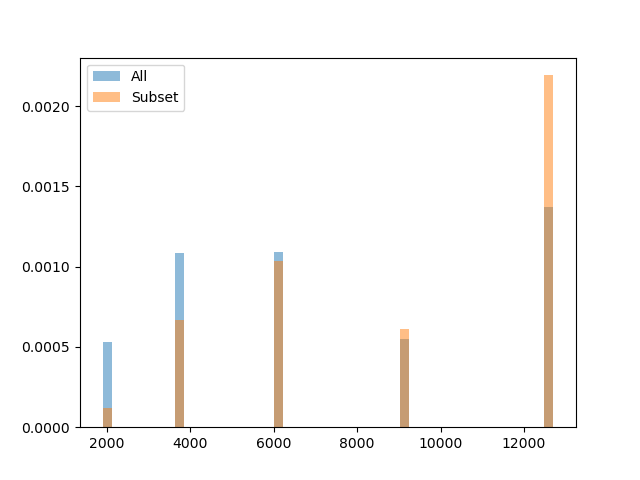

In [97]:
%matplotlib notebook

plt.figure()

field = 'MaNGA_IFU'

plt.hist(data[field], bins=50, density=True, alpha=0.5, label='All')
plt.hist(data[field][galaxies_with_ratio_between_3p9and4p0], bins=50, 
         density=True, alpha=0.5, label='Subset')

plt.legend();

# Distribution in $V_{max}$

Also going to check $V_{max}$ to see if it is being incorrectly influenced by the bounds.

<IPython.core.display.Javascript object>


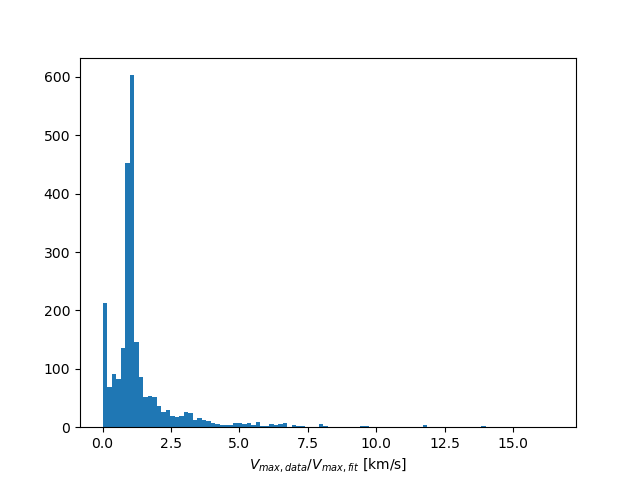

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [22]:
%matplotlib notebook

plt.figure()

plt.hist(data['Vmax_data_fit_ratio'], bins=100)

plt.xlabel('$V_{max, data}$/$V_{max, fit}$ [km/s]');

Yup, they are: the spikes at $\frac{2}{3}$ and 2 correspond to the maximum and minimum bounds.

<IPython.core.display.Javascript object>


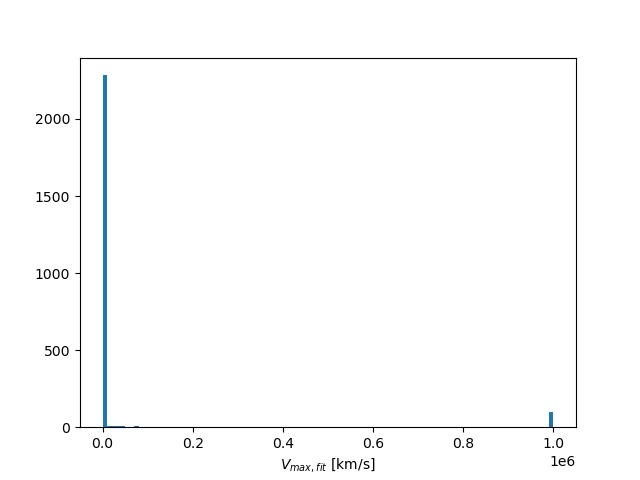

In [23]:
%matplotlib notebook

plt.figure()

plt.hist(data['v_max_used'], bins=100)

plt.xlabel('$V_{max, fit}$ [km/s]');